In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from magnetar.funcs import init_conds, ODEs

%matplotlib inline

# Some parameters for formatting
colours = ['r', 'r', 'g', 'g']
lines = ['-', '--', '-', '--']

ImportError: No module named magnetar.funcs

In [2]:
# Constants
G = 6.674e-8    # Gravitational constant - cgs units
Msol = 1.99e33  # Solar mass - grams
M = 1.4 * Msol  # Magnetar mass - grams
R = 1.0e6       # Magnetar radius - cm
alpha = 0.1     # Sound speed prescription
cs7 = 1.0       # Sound speed - cm/s
GM = G * M

B = 1.0         # Magnetic Field Strength - 10^15 Gauss
P = 5.0         # Initial spin period - milliseconds
MdiscI = 0.001  # Initial disc mass - Solar masses
RdiscI = 100.0  # Disc radius - km

mu = 1.0e15 * B * R ** 3.0             # Magnetic Dipole Moment
Rdisc = RdiscI * 1.0e5                 # Convert disc radius to cm
tvisc = Rdisc / (alpha * cs7 * 1.0e7)  # Viscous timescale - seconds

t = np.logspace(0.0, 6.0, base=10.0, num=10001)  # Time array

y = init_conds([P, MdiscI])

vals = [[1.0, 1.0], [1.0, 10.0], [10.0, 1.0], [10.0, 10.0]]  # Values of epsilon and delta to solve for

NameError: name 'init_conds' is not defined

NameError: name 'vals' is not defined

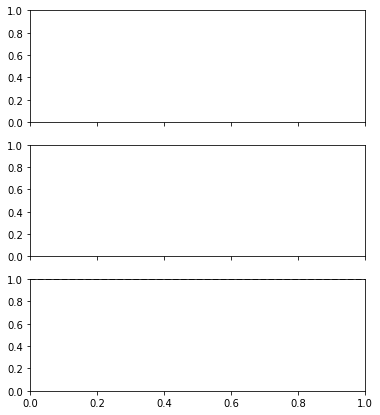

In [3]:
# Set up the figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,7))
ax3.axhline(1.0, ls='--', c='k')

# Loop over the epsilon and delta values
for i, val in enumerate(vals):
    epsilon, delta = val

    # Solve the ODEs and split the solution
    soln = odeint(ODEs, y, t, args=(B, MdiscI, RdiscI, epsilon, delta))
    Mdisc = soln[:,0]
    omega = soln[:,1]
    
    # Radii
    Rm = mu ** (4.0 / 7.0) * GM ** (-1.0 / 7.0) * (Mdisc / tvisc) ** (-2.0 / 7.0)
    Rc = (GM / omega ** 2.0) ** (1.0 / 3.0)
    
    # Plotting
    ax1.loglog(t, Mdisc/Msol, ls=lines[i], c=colours[i], label='$\epsilon$ = {0}; $\delta$ = {1}'.format(int(epsilon), int(delta)))
    ax2.semilogx(t, omega, ls=lines[i], c=colours[i])
    ax3.semilogx(t, Rm/Rc, ls=lines[i], c=colours[i])

# Plot formatting
ax1.set_xlim(1.0e0, 1.0e6)
ax1.set_ylim(bottom=1.0e-8)
ax2.set_xlim(1.0e0, 1.0e6)
ax3.set_xlim(1.0e0, 1.0e6)
ax3.set_ylim(0.0, 2.0)

ax1.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='major', labelsize=8)
ax3.tick_params(axis='both', which='major', labelsize=8)

ax1.legend(loc='upper right', fontsize=8)
ax3.set_xlabel('Time (s)', fontsize=10)

ax1.set_ylabel('$M_{\\rm D}~\left({\\rm M}_{\odot}\\right)$', fontsize=10)
ax2.set_ylabel('$\omega~\left({\\rm s}^{-1}\\right)$', fontsize=10)
ax3.set_ylabel('$r_{\\rm m}/r_{\\rm c}$', fontsize=10)